# 이미지 불러오고 표시하기

## 이미지 준비

먼저 실습에 사용할 이미지를 준비합니다. 여기서는 [Red Shuheart](https://unsplash.com/@mirrors_are_more_fun)가 [Unsplash](https://unsplash.com/)에 공개한 이미지를 사용하겠습니다.

```{figure} images/example.jpg
---
alt: torchvision 실습에 사용할 예시 이미지
name: 예시 이미지
width: 640px
align: center
---
위 사진과 관련한 자세한 정보는 [여기](https://unsplash.com/photos/a-group-of-people-walking-along-a-river-next-to-tall-buildings-c91mpA0KwZ4)에서, 작가의 다른 사진들은 [여기](https://unsplash.com/@mirrors_are_more_fun)에서 확인하실 수 있습니다.
```

In [2]:
# 이미지 준비에 필요한 라이브러리 불러오기
from io import BytesIO
import requests
from PIL import Image

In [3]:
# URL로부터 이미지를 다운로드하고 파일로 저장하는 함수
def save_image_from_url(image_url, file_path='./temp.jpg'):
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()

        image = Image.open(BytesIO(response.content))
        image.save(file_path)
        print(f'Image saved successfully to {file_path}')
    except requests.exceptions.RequestException as e:
        print(f'Error downloading image: {e}')
    except Exception as e:
        print(f'Error saving image: {e}')

In [4]:
# URL로부터 이미지를 내려받아 sample.jpg로 저장
img_url = 'https://images.unsplash.com/photo-1687779176476-55920ac3f400?q=80&w=1024&auto=format'
save_image_from_url(img_url, 'sample.jpg')

Image saved successfully to sample.jpg


In [ ]:
# 저장된 파일 확인
!ls -hlF sample.jpg

## `PIL.Image`와 `torch.Tensor`

`torchvision.transforms`는 이미지 데이터 전처리와 증강을 위한 다양한 도구를 제공합니다. 또한 여러가지 변환(transform)들을 조합하여 데이터 전처리 파이프라인을 만들 수 있습니다. 이렇게 `torchvision`을 사용하여 이미지를 불러오거나 변환하는 경우, 모델이 바로 사용할 수 있도록 `torch.Tensor` 자료형을 반환하는 경우가 대부분입니다. 

```{note}
[torchvision 공식 문서](https://pytorch.org/vision/stable/transforms.html)를 확인하여 반환되는 자료형과 사용법을 참고하시기 바랍니다.
```

이러한 `torch.Tensor` 자료형은 다차원의 실수로 구성되어 있어 변환 결과를 사람이 확인하기에는 적절하지 않습니다. 따라서 변환 결과를 직접 눈으로 확인할 수 있도록 `Pillow`와 `matplotlib`의 2가지 라이브러리를 더 사용하겠습니다. 먼저 `Pillow` 라이브러리를 사용하여 이미지를 불러온 후, `torchvision.transforms`의 변환들을 적용하고, `matplotlib` 라이브러리를 사용하여 이미지를 표시하여 변환 결과를 확인해보도록 하겠습니다.

```{note}
`torchvision.transforms` 모듈 내의 대부분의 변환들은 `torch.Tensor` 또는 `Pillow.Image` 자료형을 입력으로 받습니다. `torch.Tensor` 자료형으로 입력되는 경우에는 `(C, H, W)` 또는 `(B, C, H, W)`의 크기를 갖는 3차원 또는 4차원의 값입니다. 이 때 `H`와 `W`는 각각 높이(Height)와 넓이(Width), `C`는 이미지의 채널 수(Channel, RGB 이미지의 경우 3)를 뜻하고, `B`는 2개 이상의 이미지를 묶는 경우 각 묶음(Batch)에 포함된 이미지 수입니다.
```

자주 사용하는 변환 기능은 다음과 같습니다:
- ToPILImage: Tensor를 PIL.Image로 변환
- ToDtype: 이미지를 Tensor로 변경하거나, Tensor의 자료형을 변경
- Normalize: 평균과 표준편차를 기준으로 정규화
- Resize: 이미지를 특정 크기로 조정
- RandomCrop: 랜덤으로 자르기
- RandomHorizontalFlip: 이미지를 랜덤으로 좌우 반전
- ColorJitter: 밝기, 대비, 채도를 랜덤으로 변경

In [5]:
import torchvision

# 이미지를 불러오고 시각화하기 위해 Pillow와 Matplotlib을 사용합니다.
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
# 가져올 이미지 파일 경로 - 앞에서 저장한 이미지 파일명을 지정합니다.
img_fn = './sample.jpg'

## `torch.Tensor` 자료형으로 이미지 읽기

Tensor는 다차원의 배열로 NumPy의 ndarray와 유사한 자료형입니다. PyTorch에서는 Tensor를 사용하여 다양한 수치 연산을 수행할 수 있습니다.

In [7]:
# torchvision.io.read_image()를 활용하여 이미지를 불러옵니다.
# 불러온 이미지는 torch.Tensor 자료형으로 반환합니다.
img_tensor = torchvision.io.read_image(img_fn)
assert img_tensor is not None, '이미지 불러오기에 실패하였습니다.'

# 자료형과 크기를 확인합니다.
print(type(img_tensor), img_tensor.shape) # 자료형은 torch.Tensor, 크기는 [3, 683, 1024] (C, H, W)임을 확인할 수 있습니다.

<class 'torch.Tensor'> torch.Size([3, 683, 1024])


## Tensor를 `PIL.Image`로 변환하기

In [8]:
# torchvision.transforms.ToPILImage을 사용하면 `torch.Tensor`를 `PIL.Image`로 변환할 수 있는 객체를 반환합니다.
# 반대의 경우에는 torchvision.transforms.ToTensor()를 사용할 수 있습니다.
convert_to_PIL_Image = torchvision.transforms.ToPILImage()

# torchvision.transforms의 변환 Class들에는 `__call__` Magic Method가 정의되어 있어, 각 객체를 함수처럼 호출할 수 있습니다.
img_obj = convert_to_PIL_Image(img_tensor) # torch.Tensor를 PIL.Image로 변환

# PIL.Image의 size로 이미지 크기 확인 (W, H)
img_obj.size

(1024, 683)

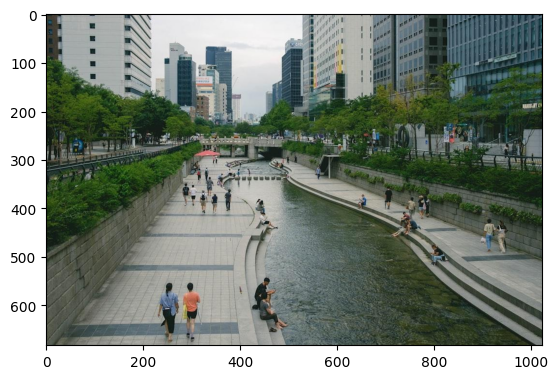

In [9]:
# matplotlib 라이브러리를 사용하여 이미지를 시각화합니다.
plt.imshow(img_obj)

```{note}
`PIL.Image`를 `torch.Tensor`로 변환하려면 `torchvision.transforms.v2.ToDtype()`를 사용하면 됩니다.
```

## 여러 이미지 Tensor들을 하나로 만들기

`torchvision.utils.make_grid()`을 사용하여 여러 이미지 Tensor들을 하나로 만들어 시각화할 수 있습니다. `make_grid()`의 입력은 여러 이미지를 갖고 있는 다차원의 Tensor 또는 이미지 Tensor들의 list입니다. 반환하는 자료형은 `PIL.Image`입니다.

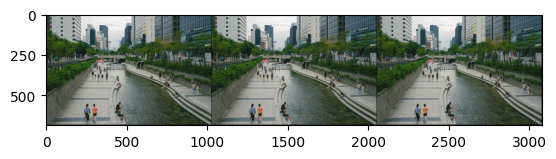

In [11]:
# 여러 이미지는 `torchvision.utils.make_grid()`를 사용하여 합쳐서 시각화할 수 있습니다.
from torchvision.utils import make_grid

# make_grid()는 다차원의 Tensor 또는 Tensor list를 입력으로 받습니다.
img_tensors = [img_tensor, img_tensor, img_tensor] # 3개의 이미지를 리스트로 묶어줍니다.
grid_tensor = make_grid(img_tensors)

# make_grid()는 Tensor를 반환하며, 이를 시각화하기 위해 PIL.Image로 변환합니다.
grid_img = convert_to_PIL_Image(grid_tensor)
plt.imshow(grid_img)

In [ ]:
import torch

# 다음과 같이 Tensor들의 list를 다차원의 Tensor로 만들 수 있습니다.
img_tensors2 = torch.stack([img_tensor, img_tensor, img_tensor], dim=0)
grid_tensor2 = make_grid(img_tensors2)

# make_grid()는 Tensor를 반환하며, 이를 시각화하기 위해 PIL.Image로 변환합니다.
grid_img2 = convert_to_PIL_Image(grid_tensor2)
plt.imshow(grid_img2)